<a href="https://colab.research.google.com/github/anoohyabhaskarla/Weather-aware-paddy-Disease-Detection/blob/main/Paddydiseaseweather.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# GROUP 19

---


Anoohya Alivelu Bhaskarla
11664418

Vyshnavi Annamaneni
11705823

Achyuth Kumar Miryala
11711400

# Weather Aware Paddy Disease Detection
  
**Objectives**
1. Develop real time weather based classification model.
2. Enhance dataset diversity with weather based augmentation techniques.
3. Create a multi-input neural network that combines both image and weather anal-
ysis.
4. Real world application of the model and its assessment.



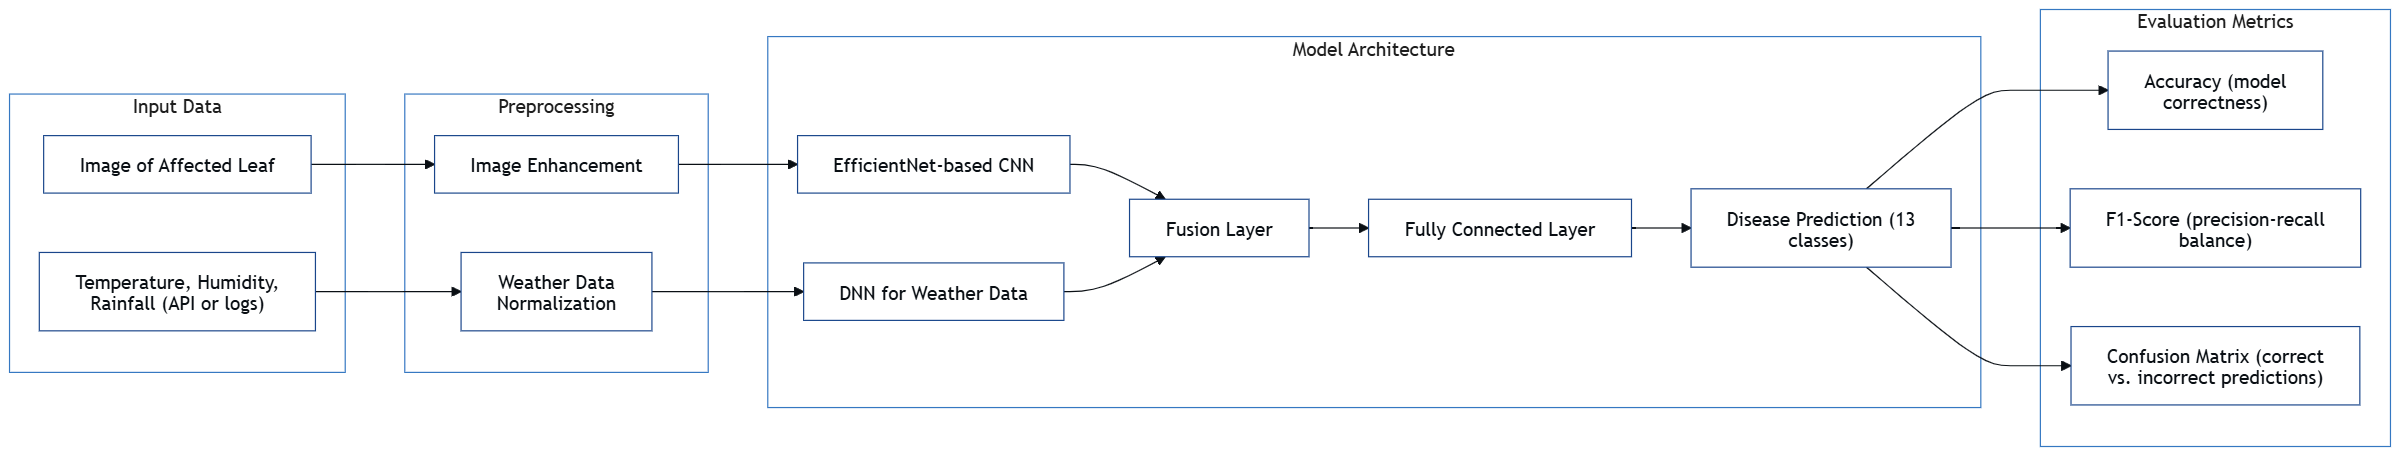

# Data Collection

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
dataset_path = "/content/drive/MyDrive/paddy_data/Dataset/train"

In [ ]:
!pip install -U gdown
import gdown

In [ ]:
file_id = "1lSURKHdQr3VTpLiYOjXBa-C4mdxfWmrg"
gdown.download(f"https://drive.google.com/uc?id={file_id}", "paddy_dataset.zip", quiet=False)

Downloading...
From (original): https://drive.google.com/uc?id=1lSURKHdQr3VTpLiYOjXBa-C4mdxfWmrg
From (redirected): https://drive.google.com/uc?id=1lSURKHdQr3VTpLiYOjXBa-C4mdxfWmrg&confirm=t&uuid=b2742c7e-4e55-4a34-8bf6-2dd753c53469
To: /content/paddy_dataset.zip
100%|██████████| 13.2G/13.2G [01:45<00:00, 126MB/s]


'paddy_dataset.zip'

In [ ]:
!unzip -q "paddy_dataset.zip" -d "paddy_data"
train_dir = 'paddy_data/Dataset/train'
test_dir = 'paddy_data/Dataset/test'

In [ ]:
import os
import cv2
import numpy as np
import pandas as pd
from tensorflow.keras.utils import to_categorical
import requests

# 📁 Path to your extracted dataset (with 13 class folders inside)
dataset_path = "paddy_data/Dataset/train"

# 🌀 Load and preprocess Paddy Disease Dataset
def load_paddy_dataset(root_dir, img_size=(256, 256)):
    images = []
    labels = []
    class_names = sorted(os.listdir(root_dir))
    class_map = {name: idx for idx, name in enumerate(class_names)}

    for class_name in class_names:
        class_path = os.path.join(root_dir, class_name)
        if os.path.isdir(class_path):
            for img_file in os.listdir(class_path):
                if img_file.lower().endswith(('.jpg', '.jpeg', '.png')):
                    img_path = os.path.join(class_path, img_file)
                    img = cv2.imread(img_path)
                    if img is not None:
                        img = cv2.resize(img, img_size)
                        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
                        images.append(img)
                        labels.append(class_map[class_name])

    return np.array(images), np.array(labels), class_map


# ✅ Load images and labels
X_raw, y_raw, class_map = load_paddy_dataset(dataset_path)
print(f"✅ Loaded {len(X_raw)} images, shape: {X_raw.shape}")

# 🔁 One-hot encode labels
y_encoded = to_categorical(y_raw)

# 📊 Display class-wise distribution
label_counts = np.bincount(y_raw)
label_df = pd.DataFrame({
    "Class Name": [cls for cls, idx in sorted(class_map.items(), key=lambda x: x[1])],
    "ClassId": np.arange(len(label_counts)),
    "Image Count": label_counts
})
print("\n📊 Class-wise Image Distribution:")
print(label_df.to_string(index=False))



✅ Loaded 12975 images, shape: (12975, 256, 256, 3)

📊 Class-wise Image Distribution:
              Class Name  ClassId  Image Count
               .DS_Store        0            0
   bacterial_leaf_blight        1          518
   bacterial_leaf_streak        2          404
bacterial_panicle_blight        3          360
        black_stem_borer        4          404
                   blast        5         1880
              brown_spot        6         1005
            downy_mildew        7          694
                   hispa        8         1720
             leaf_roller        9          876
                  normal       10         1924
                  tungro       11         1560
        white_stem_borer       12         1018
       yellow_stem_borer       13          612


In [ ]:
print("Classes found:", train_generator.class_indices)

Classes found: {'bacterial_leaf_blight': 0, 'bacterial_leaf_streak': 1, 'bacterial_panicle_blight': 2, 'black_stem_borer': 3, 'blast': 4, 'brown_spot': 5, 'downy_mildew': 6, 'hispa': 7, 'leaf_roller': 8, 'normal': 9, 'tungro': 10, 'white_stem_borer': 11, 'yellow_stem_borer': 12}


# Data Cleaning

In [ ]:
import matplotlib.pyplot as plt
import cv2
import random

def visualize_before_after(original_paths, cleaned_images, num_samples=5):
    plt.figure(figsize=(10, num_samples * 2.5))

    sample_indices = random.sample(range(len(cleaned_images)), num_samples)

    for i, idx in enumerate(sample_indices):
        # Load original image from file
        original_img = cv2.imread(original_paths[idx])
        original_img = cv2.cvtColor(original_img, cv2.COLOR_BGR2RGB)

        # Get cleaned image (assumed to be already in RGB)
        cleaned_img = cleaned_images[idx]

        # Plot original
        plt.subplot(num_samples, 2, i * 2 + 1)
        plt.imshow(original_img)
        plt.title("Original")
        plt.axis("off")

        # Plot cleaned
        plt.subplot(num_samples, 2, i * 2 + 2)
        plt.imshow(cleaned_img)
        plt.title("Cleaned")
        plt.axis("off")

    plt.tight_layout()
    plt.show()


In [ ]:
def clean_and_preprocess_paddy_dataset(dataset_path):
    original_paths = []
    X_cleaned = []
    y_cleaned = []
    class_map = {}

    # Walk through dataset and process images
    for class_id, class_name in enumerate(sorted(os.listdir(dataset_path))):
        class_path = os.path.join(dataset_path, class_name)
        if not os.path.isdir(class_path):
            continue
        class_map[class_name] = len(class_map)
        for fname in os.listdir(class_path):
            fpath = os.path.join(class_path, fname)
            if not fpath.lower().endswith((".jpg", ".jpeg", ".png")):
                continue
            try:
                img = cv2.imread(fpath)
                img = cv2.resize(img, (224, 224))  # for example
                img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
                X_cleaned.append(img)
                y_cleaned.append(class_map[class_name])
                original_paths.append(fpath)
            except Exception as e:
                print(f"Error reading {fpath}: {e}")

    return X_cleaned, y_cleaned, class_map, [], original_paths


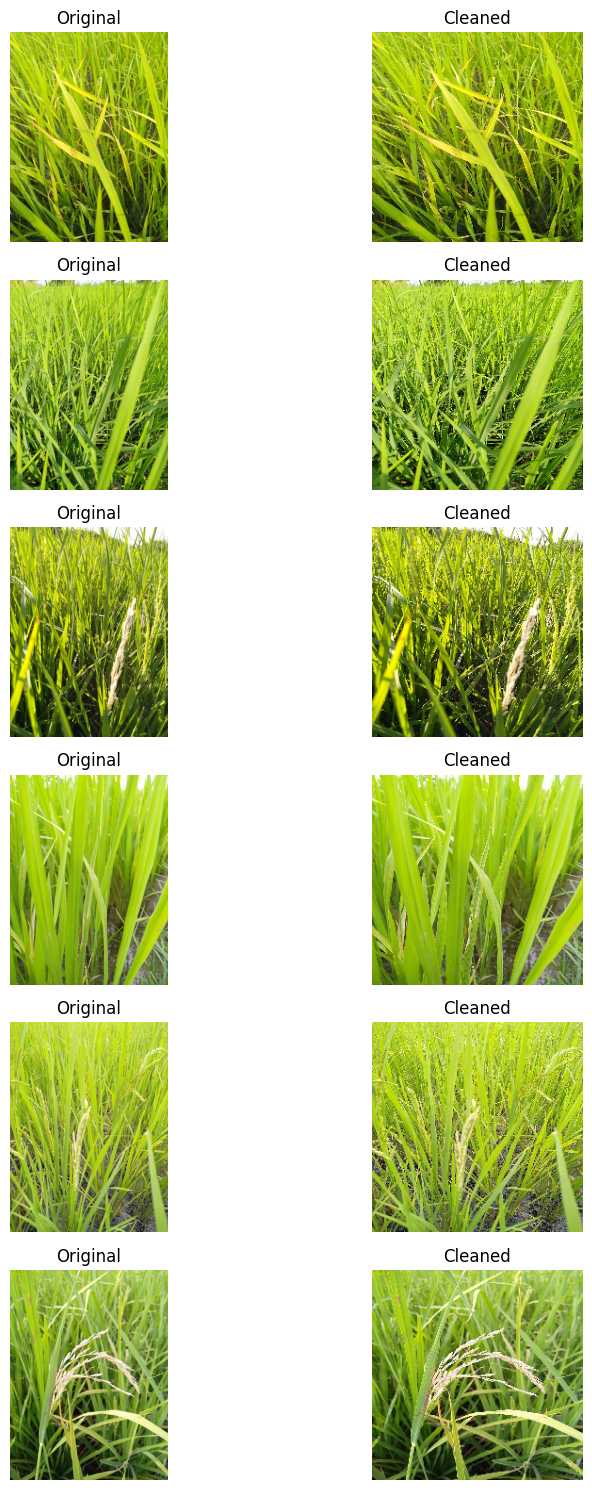

In [ ]:
X_cleaned, y_cleaned, class_map, skipped_images, original_paths = clean_and_preprocess_paddy_dataset(dataset_path)
visualize_before_after(original_paths, X_cleaned, num_samples=6)

# Data Preprocessing

In [ ]:
import os, cv2, numpy as np
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

# Define target image size and batch parameters
image_size = (224, 224)

# Load and preprocess images into arrays
def load_paddy_dataset(root_dir, img_size=image_size):
    X, y, class_map = [], [], {}
    for idx, cls in enumerate(sorted(os.listdir(root_dir))):
        cls_dir = os.path.join(root_dir, cls)
        if os.path.isdir(cls_dir):
            class_map[cls] = idx
            for fname in os.listdir(cls_dir):
                if fname.lower().endswith(('.jpg','.png','.jpeg')):
                    img_path = os.path.join(cls_dir, fname)
                    img = cv2.imread(img_path)
                    if img is None:
                        continue
                    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
                    img = cv2.resize(img, img_size)
                    X.append(img.astype(np.float32) / 255.0)
                    y.append(idx)
    return np.array(X), np.array(y), class_map

# Execute loading
X_all, y_all, class_map = load_paddy_dataset(train_dir)
print(f"Loaded {X_all.shape[0]} images with size {image_size}.")

# One-hot encode labels
y_enc = to_categorical(y_all)

# Split into train/test sets
X_train, X_test, y_train, y_test = train_test_split(
    X_all, y_enc, test_size=0.2, stratify=y_all, random_state=42
)
print(f"Split: {X_train.shape[0]} train, {X_test.shape[0]} test.")

Loaded 12975 images with size (224, 224).
Split: 10380 train, 2595 test.


In [ ]:
## 3. Real-Time Weather Data Integration (API)
import requests
import numpy as np
import tensorflow as tf



API_KEY = "d9644c6b7581ce2dcff29b84b0c4058b"
CITY = "Tirunelveli,IN"

def get_weather_data(api_key, city='Tirunelveli,IN'):
    url = f"https://api.openweathermap.org/data/2.5/weather?q={city}&appid={api_key}&units=metric"
    response = requests.get(url)
    data = response.json()

    # Extract weather features
    temp = data['main']['temp']
    humidity = data['main']['humidity']
    pressure = data['main']['pressure']
    wind_speed = data['wind']['speed']
    cloud_coverage = data.get('clouds', {}).get('all', 0)
    rain_volume = data.get('rain', {}).get('1h', 0.0)

    return np.array([temp, humidity, pressure, wind_speed, cloud_coverage, rain_volume], dtype=np.float32)

# Fetch once for all images
weather_vec = get_weather_data(API_KEY, CITY)

weather_train = np.tile(weather_vec, (X_train.shape[0], 1))
weather_test  = np.tile(weather_vec, (X_test.shape[0], 1))



# Data Loading for Model Training

In [ ]:
%whos


Variable             Type         Data/Info
-------------------------------------------
X_all                ndarray      12975x224x224x3: 1953100800 elems, type `float32`, 7812403200 bytes (7450.48828125 Mb)
X_raw                ndarray      12975x256x256x3: 2550988800 elems, type `uint8`, 2550988800 bytes (2432.8125 Mb)
X_test               ndarray      2595x224x224x3: 390620160 elems, type `float32`, 1562480640 bytes (1490.09765625 Mb)
X_train              ndarray      10380x224x224x3: 1562480640 elems, type `float32`, 6249922560 bytes (5960.390625 Mb)
class_map            dict         n=13
cv2                  module       <module 'cv2' (<google.co<...>ject at 0x7d61904e0790>)>
dataset_path         str          paddy_data/Dataset/train
drive                module       <module 'google.colab.dri<...>s/google/colab/drive.py'>
file_id              str          1lSURKHdQr3VTpLiYOjXBa-C4mdxfWmrg
gdown                module       <module 'gdown' from '/us<...>kages/gdown/__init__.py'>
im

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(256, 256),
    batch_size=32,
    class_mode='categorical',
    shuffle=True
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(256, 256),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)

Found 12975 images belonging to 13 classes.
Found 3250 images belonging to 13 classes.


In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(256, 256),
    batch_size=32,
    class_mode='categorical',
    subset='traini ng'
)

val_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(256, 256),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)

Found 10385 images belonging to 13 classes.
Found 2590 images belonging to 13 classes.


# Data Transformation

In [ ]:
import requests

def get_weather_data(api_key, city='Tirunelveli,IN'):
    """
    Fetches real-time weather data using OpenWeatherMap API.
    Returns a dictionary of weather conditions relevant to paddy disease prediction.
    """
    url = f"https://api.openweathermap.org/data/2.5/weather?q={city}&appid={api_key}&units=metric"
    response = requests.get(url)
    data = response.json()

    # Extract key parameters
    temp = data['main']['temp']
    humidity = data['main']['humidity']
    pressure = data['main']['pressure']
    wind_speed = data['wind']['speed']
    weather_condition = data['weather'][0]['main']  # e.g., Rain, Clear, Clouds
    cloud_coverage = data['clouds']['all'] if 'clouds' in data else 0
    rain_volume = data.get('rain', {}).get('1h', 0.0)  # in mm if raining in last 1h

    # Print analysis
    print(f"📍 Location: {city}")
    print(f"🌡️ Temperature: {temp} °C")
    print(f"💧 Humidity: {humidity} %")
    print(f"🌬️ Wind Speed: {wind_speed} m/s")
    print(f"☁️ Cloud Coverage: {cloud_coverage} %")
    print(f"🌧️ Rain Volume (1h): {rain_volume} mm")
    print(f"🌥️ Weather Condition: {weather_condition}")
    print(f"🔽 Atmospheric Pressure: {pressure} hPa")

    # Optional rule-based hints (for understanding)
    if humidity > 80 and 20 <= temp <= 30:
        print("⚠️ Fungal disease risk: e.g., Blast or Brown Spot.")
    elif temp > 32 and humidity < 60:
        print("⚠️ Bacterial disease risk: e.g., Bacterial Leaf Blight.")
    elif rain_volume > 5:
        print("⚠️ Excess moisture can lead to multiple paddy infections.")
    else:
        print("✅ Weather conditions not strongly indicating specific disease risk.")

    return {
        "temperature": temp,
        "humidity": humidity,
        "pressure": pressure,
        "wind_speed": wind_speed,
        "cloud_coverage": cloud_coverage,
        "rain_volume": rain_volume
    }

# 🚀 Example usage
API_KEY = "d9644c6b7581ce2dcff29b84b0c4058b"
CITY = "Tirunelveli,IN"

weather_input = get_weather_data(API_KEY, CITY)

# If using with model:
# weather_vector = np.array([[weather_input['temperature'], weather_input['humidity']]])


📍 Location: Tirunelveli,IN
🌡️ Temperature: 28.37 °C
💧 Humidity: 67 %
🌬️ Wind Speed: 3.19 m/s
☁️ Cloud Coverage: 7 %
🌧️ Rain Volume (1h): 0.0 mm
🌥️ Weather Condition: Clear
🔽 Atmospheric Pressure: 1007 hPa
✅ Weather conditions not strongly indicating specific disease risk.


In [ ]:
from tensorflow.keras.applications import EfficientNetV2L
from tensorflow.keras.layers import Input, Dense, Dropout, GlobalAveragePooling2D, Concatenate
from tensorflow.keras.models import Model

# Image branch
image_input = Input(shape=(224, 224, 3), name="image_input")
base_model = EfficientNetV2L(include_top=False, weights='imagenet', input_tensor=image_input)
x = GlobalAveragePooling2D()(base_model.output)
x = Dropout(0.3)(x)
x = Dense(256, activation='relu')(x)

473176280/473176280 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [ ]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
import requests
import numpy as np

# Convert to NumPy array
X_cleaned = np.array(X_cleaned)

# One-hot encode labels
y_encoded = to_categorical(y_cleaned)
print(f"✅ Labels one-hot encoded: shape = {y_encoded.shape}")

# Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X_cleaned, y_encoded, test_size=0.2, stratify=y_cleaned, random_state=42
)

print(f"✅ Split: {X_train.shape[0]} train, {X_test.shape[0]} test")

def get_weather_data(api_key, city='Tirunelveli,IN'):
    """
    Fetches real-time weather data using OpenWeatherMap API.
    Returns a dictionary of weather conditions relevant to paddy disease prediction.
    """
    url = f"https://api.openweathermap.org/data/2.5/weather?q={city}&appid={api_key}&units=metric"
    response = requests.get(url)
    data = response.json()

    # Extract key parameters
    temp = data['main']['temp']
    humidity = data['main']['humidity']
    pressure = data['main']['pressure']
    wind_speed = data['wind']['speed']
    weather_condition = data['weather'][0]['main']  # e.g., Rain, Clear, Clouds
    cloud_coverage = data['clouds']['all'] if 'clouds' in data else 0
    rain_volume = data.get('rain', {}).get('1h', 0.0)  # in mm if raining in last 1h

    # Print analysis
    print(f"📍 Location: {city}")
    print(f"🌡️ Temperature: {temp} °C")
    print(f"💧 Humidity: {humidity} %")
    print(f"🌬️ Wind Speed: {wind_speed} m/s")
    print(f"☁️ Cloud Coverage: {cloud_coverage} %")
    print(f"🌧️ Rain Volume (1h): {rain_volume} mm")
    print(f"🌥️ Weather Condition: {weather_condition}")
    print(f"🔽 Atmospheric Pressure: {pressure} hPa")

    # Optional rule-based hints (for understanding)
    if humidity > 80 and 20 <= temp <= 30:
        print("⚠️ Fungal disease risk: e.g., Blast or Brown Spot.")
    elif temp > 32 and humidity < 60:
        print("⚠️ Bacterial disease risk: e.g., Bacterial Leaf Blight.")
    elif rain_volume > 5:
        print("⚠️ Excess moisture can lead to multiple paddy infections.")
    else:
        print("✅ Weather conditions not strongly indicating specific disease risk.")

    return {
        "temperature": temp,
        "humidity": humidity,
        "pressure": pressure,
        "wind_speed": wind_speed,
        "cloud_coverage": cloud_coverage,
        "rain_volume": rain_volume
    }

# 🚀 Example usage
API_KEY = "d9644c6b7581ce2dcff29b84b0c4058b"
CITY = "Tirunelveli,IN"

weather_input = get_weather_data(API_KEY, CITY)


✅ Labels one-hot encoded: shape = (12975, 13)
✅ Split: 10380 train, 2595 test
📍 Location: Tirunelveli,IN
🌡️ Temperature: 28.37 °C
💧 Humidity: 67 %
🌬️ Wind Speed: 3.19 m/s
☁️ Cloud Coverage: 7 %
🌧️ Rain Volume (1h): 0.0 mm
🌥️ Weather Condition: Clear
🔽 Atmospheric Pressure: 1007 hPa
✅ Weather conditions not strongly indicating specific disease risk.


# Weather-based Augmentation

In [ ]:
## 4. Weather-based Augmentation (Visual Effects)
import numpy as np
import cv2
import random
import matplotlib.pyplot as plt

# --- Weather effect functions ---
def add_fog(image):
    # Gaussian blur to simulate fog
    return cv2.GaussianBlur(image, (15, 15), 0)

def add_rain(image, drop_count=100):
    # Random vertical streaks for rain
    rainy = image.copy()
    h, w, _ = rainy.shape
    for _ in range(drop_count):
        x = np.random.randint(0, w)
        y = np.random.randint(0, h)
        cv2.line(rainy, (x, y), (x + np.random.randint(-2, 2), y + np.random.randint(10, 20)), (200, 200, 200), 1)
    return cv2.addWeighted(image, 0.8, rainy, 0.2, 0)

def add_snow(image, intensity=0.02):
    # White snowflakes scattered
    snowy = image.copy()
    h, w, _ = snowy.shape
    num_flakes = int(intensity * h * w)
    for _ in range(num_flakes):
        x, y = np.random.randint(0, w), np.random.randint(0, h)
        cv2.circle(snowy, (x, y), np.random.randint(1, 3), (255, 255, 255), -1)
    return cv2.addWeighted(image, 0.9, snowy, 0.1, 0)

def add_brightness(image, factor=1.2):
    # Multiply pixel values for brightness
    bright = np.clip(image.astype(np.float32) * factor, 0, 255)
    return bright.astype(np.uint8)

def add_shadow(image):
    # Dark rectangle to simulate shadow
    shadow = image.copy()
    h, w, _ = shadow.shape
    x1, y1 = np.random.randint(0, w), np.random.randint(0, h)
    x2, y2 = np.random.randint(x1, w), np.random.randint(y1, h)
    shadow[y1:y2, x1:x2] = (shadow[y1:y2, x1:x2] * 0.5).astype(np.uint8)
    return cv2.addWeighted(image, 0.8, shadow, 0.2, 0)

def add_haze(image):
    # Semi-transparent white overlay
    haze = np.full_like(image, 255, dtype=np.uint8)
    return cv2.addWeighted(image, 0.6, haze, 0.4, 0)

def add_wind_blur(image):
    # Horizontal motion blur
    k = np.zeros((1, 15))
    k[0] = np.ones(15)
    k /= 15
    return cv2.filter2D(image, -1, k)

def add_cloud_cover(image):
    # Darken image to simulate clouds
    return np.clip(image.astype(np.float32) * 0.8, 0, 255).astype(np.uint8)

def add_lightning_flash(image):
    # Bright flash region
    flash = image.copy()
    h, w, _ = flash.shape
    x1, y1 = np.random.randint(0, w), np.random.randint(0, h)
    x2, y2 = np.random.randint(x1, w), np.random.randint(y1, h)
    flash[y1:y2, x1:x2] = (flash[y1:y2, x1:x2] * 1.5).clip(0, 255).astype(np.uint8)
    return cv2.addWeighted(image, 0.8, flash, 0.2, 0)

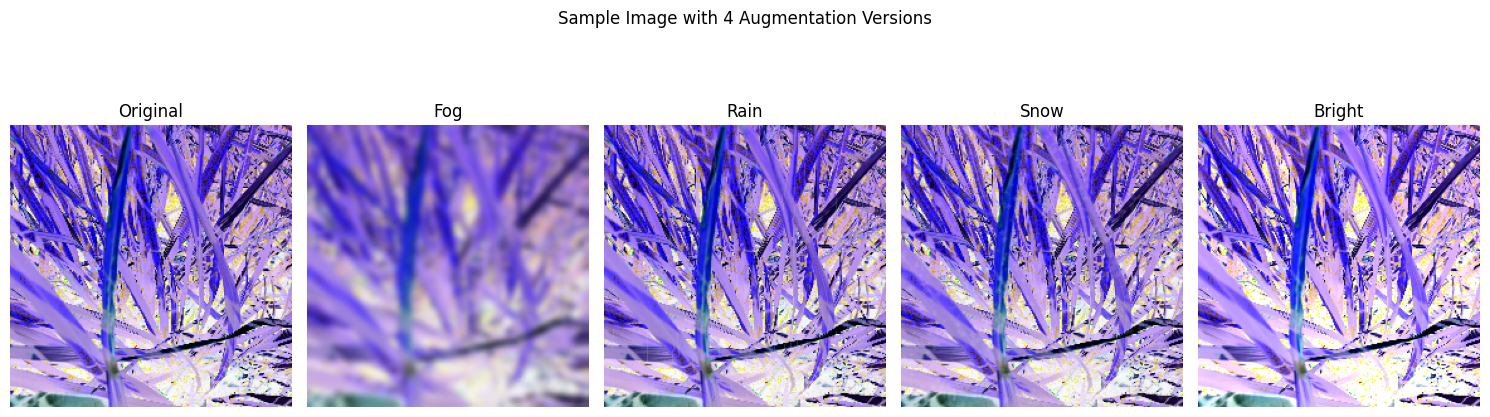

In [ ]:
## 5. Display Augmented Images
# Select one sample image
sample_img = (X_train[0] * 255).astype(np.uint8)

# Generate four versions
versions = [sample_img,
            add_fog(sample_img),
            add_rain(sample_img),
            add_snow(sample_img),
            add_brightness(sample_img)]

titles = ['Original', 'Fog', 'Rain', 'Snow', 'Bright']

plt.figure(figsize=(15, 5))
for i, (img, title) in enumerate(zip(versions, titles)):
    plt.subplot(1, len(versions), i+1)
    plt.imshow(img)
    plt.title(title)
    plt.axis('off')
plt.suptitle('Sample Image with 4 Augmentation Versions')
plt.tight_layout()
plt.show()


# Data Augmentation for Training

In [ ]:

# Augment 25% of training data and combine
import random

augment_fraction = 0.25
num_aug = int(len(X_train) * augment_fraction)
indices = random.sample(range(len(X_train)), num_aug)

X_aug, y_aug, weather_aug = [], [], []
for idx in indices:
    img = (X_train[idx] * 255).astype(np.uint8)
    label = y_train[idx]
    wthr = weather_train[idx]
    # Apply a random weather effect
    effect = random.choice([add_fog, add_rain, add_snow, add_brightness, add_shadow, add_haze, add_wind_blur, add_cloud_cover, add_lightning_flash])
    aug_img = effect(img)
    # Normalize back to [0,1]
    X_aug.append(aug_img.astype(np.float32) / 255.0)
    y_aug.append(label)
    weather_aug.append(wthr)

# Convert lists to arrays and concatenate
X_train_aug = np.concatenate([X_train, np.array(X_aug)], axis=0)
y_train_aug = np.concatenate([y_train, np.array(y_aug)], axis=0)
weather_train_aug = np.concatenate([weather_train, np.array(weather_aug)], axis=0)

print(f"✅ Augmented {len(X_aug)} images; New training shape: {X_train_aug.shape}")

✅ Augmented 2595 images; New training shape: (12975, 224, 224, 3)


# Combined Model Training

In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import EfficientNetV2L
from tensorflow.keras.layers import Input, GlobalAveragePooling2D, Dense, Dropout, Concatenate
from tensorflow.keras.models import Model
import numpy as np

# Define model inputs
img_in = Input(shape=(224, 224, 3), name='img_in')
weather_in = Input(shape=(6,), name='weather_in')

# CNN branch
base = EfficientNetV2L(include_top=False, weights='imagenet', input_tensor=img_in)
x = GlobalAveragePooling2D()(base.output)
x = Dropout(0.3)(x)
x = Dense(256, activation='relu')(x)

# Weather branch
w = Dense(16, activation='relu')(weather_in)

# Fusion
concat = Concatenate()([x, w])
out = Dense(len(class_map), activation='softmax')(concat)

model = Model(inputs=[img_in, weather_in], outputs=out)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ img_in (InputLayer) │ (None, 224, 224,  │          0 │ -                 │
│                     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ rescaling_1         │ (None, 224, 224,  │          0 │ img_in[0][0]      │
│ (Rescaling)         │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_conv (Conv2D)  │ (None, 112, 112,  │        864 │ rescaling_1[0][0] │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_bn             │ (None, 112, 112,  │        128 │ stem_conv[0][0]   │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_activation     │ (None, 112, 112,  │          0 │ stem_bn[0][0]     │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_project_co… │ (None, 112, 112,  │      9,216 │ stem_activation[… │
│ (Conv2D)            │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_project_bn  │ (None, 112, 112,  │        128 │ block1a_project_… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_project_ac… │ (None, 112, 112,  │          0 │ block1a_project_… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_add (Add)   │ (None, 112, 112,  │          0 │ block1a_project_… │
│                     │ 32)               │            │ stem_activation[… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1b_project_co… │ (None, 112, 112,  │      9,216 │ block1a_add[0][0] │
│ (Conv2D)            │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1b_project_bn  │ (None, 112, 112,  │        128 │ block1b_project_… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1b_project_ac… │ (None, 112, 112,  │          0 │ block1b_project_… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1b_drop        │ (None, 112, 112,  │          0 │ block1b_project_… │
│ (Dropout)           │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1b_add (Add)   │ (None, 112, 112,  │          0 │ block1b_drop[0][… │
│                     │ 32)               │            │ block1a_add[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1c_project_co… │ (None, 112, 112,  │      9,216 │ block1b_add[0][0] │
│ (Conv2D)            │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1c_project_bn  │ (None, 112, 112,  │        128 │ block1c_project_… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1c_project_ac… │ (None, 112, 112,  │          0 │ block1c_project_

 Total params: 118,078,445 (450.43 MB)

 Trainable params: 117,565,869 (448.48 MB)

 Non-trainable params: 512,576 (1.96 MB)

# Model Training

In [ ]:
history = model.fit(
    [X_train_aug, weather_train_aug], y_train_aug,
    validation_split=0.2,
    epochs=10,
    batch_size=64,
    shuffle=True
)

Epoch 1/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 584s 2s/step - accuracy: 0.1413 - loss: 45.0304 - val_accuracy: 0.1464 - val_loss: 3.2039
Epoch 2/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 50s 307ms/step - accuracy: 0.5105 - loss: 1.5627 - val_accuracy: 0.1464 - val_loss: 3.7245
Epoch 3/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 50s 308ms/step - accuracy: 0.7739 - loss: 0.7209 - val_accuracy: 0.0671 - val_loss: 10.0469
Epoch 4/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 52s 317ms/step - accuracy: 0.8667 - loss: 0.4349 - val_accuracy: 0.1341 - val_loss: 5.5420
Epoch 5/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 50s 308ms/step - accuracy: 0.9348 - loss: 0.2259 - val_accuracy: 0.1341 - val_loss: 5.3146
Epoch 6/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 50s 309ms/step - accuracy: 0.9274 - loss: 0.2425 - val_accuracy: 0.0435 - val_loss: 15.5463
Epoch 7/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 50s 307ms/step - accuracy: 0.9611 - loss: 0.1324 - val_accuracy: 0.1464 - val_loss: 9.5518
Epoch 8/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 50s 308ms/step - accuracy: 0.9593 - loss: 

# Plot Accuracy and Loss

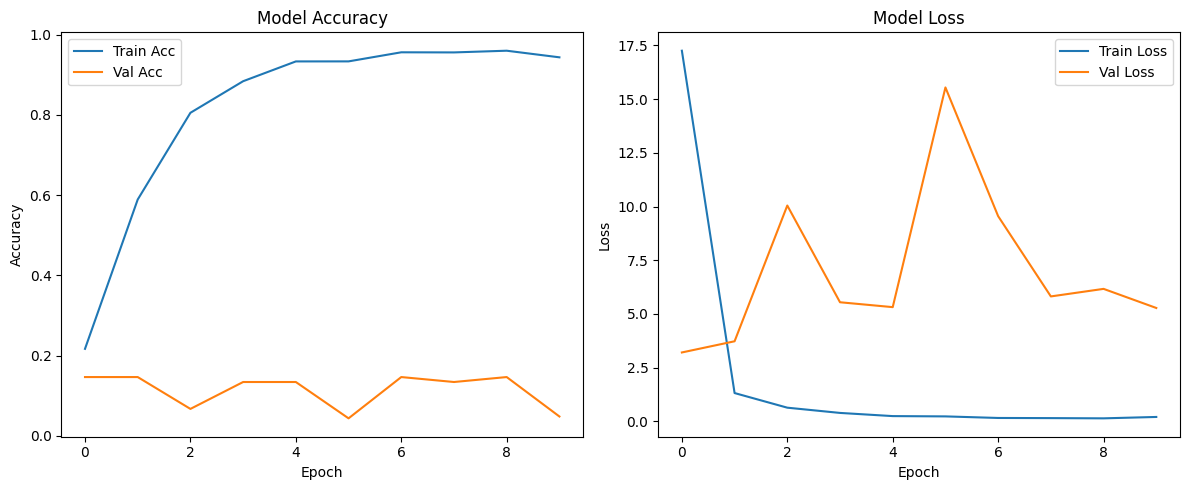

In [ ]:
## 6.2. Plotting Accuracy and Loss
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))
# Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

# Evaluation Metrics

82/82 ━━━━━━━━━━━━━━━━━━━━ 62s 355ms/step

🎯 Final Test Accuracy: 91.68%

📊 Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.92      0.89       103
           1       0.89      0.94      0.92        81
           2       0.83      0.97      0.90        72
           3       1.00      0.83      0.91        81
           4       0.95      0.93      0.94       376
           5       0.96      0.87      0.91       201
           6       0.76      0.97      0.85       139
           7       0.91      0.93      0.92       344
           8       0.91      0.90      0.90       175
           9       0.96      0.96      0.96       385
          10       0.97      0.88      0.92       312
          11       0.85      0.97      0.91       204
          12       1.00      0.77      0.87       122

    accuracy                           0.92      2595
   macro avg       0.91      0.91      0.91      2595
weighted avg       0.92      0.92  

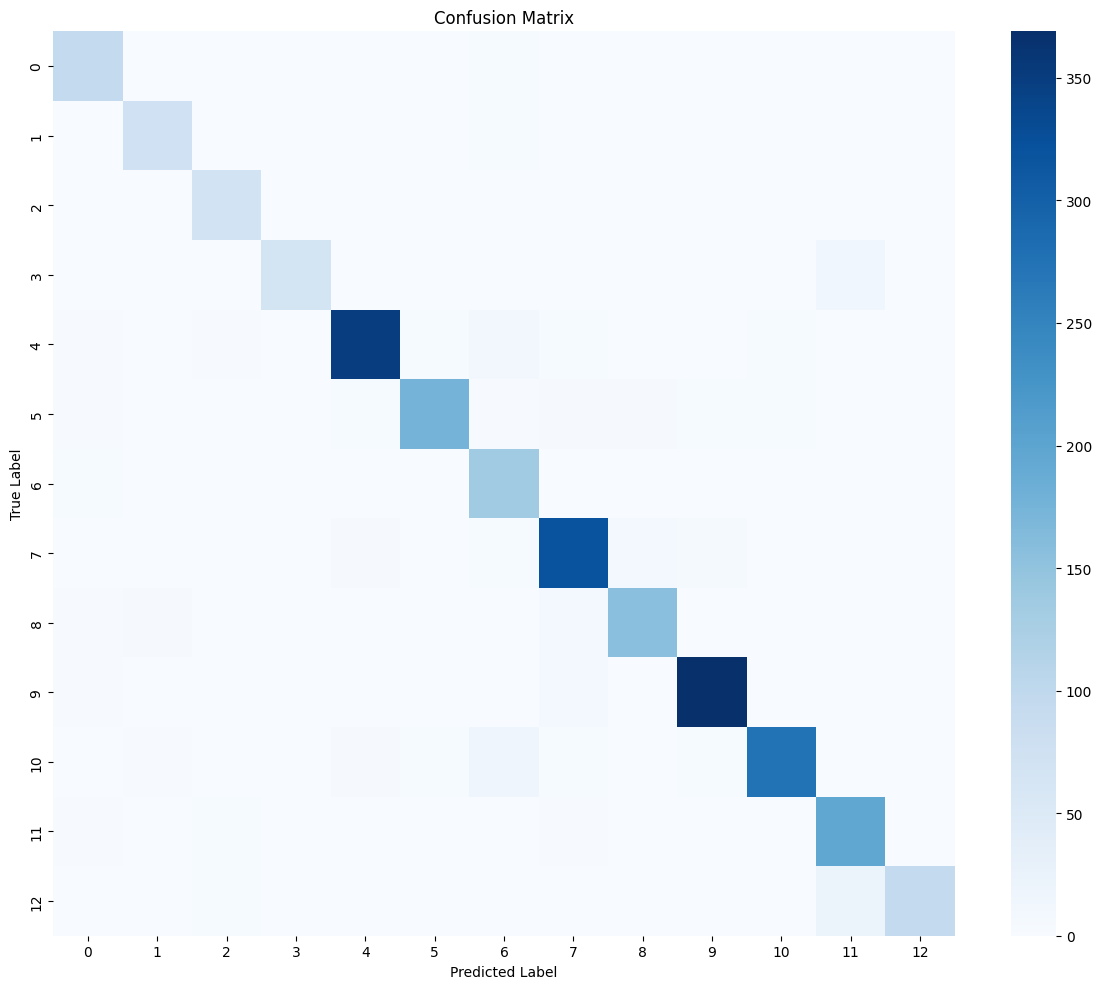

In [ ]:

# Final evaluation
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# 🎯 Predict on entire test set
y_pred_probs = model.predict([X_test, weather_test])
y_pred = np.argmax(y_pred_probs, axis=1)
y_true = np.argmax(y_test, axis=1)

# ✅ Accuracy
acc = accuracy_score(y_true, y_pred)
print(f"\n🎯 Final Test Accuracy: {acc * 100:.2f}%")

# 📄 Classification Report
print("\n📊 Classification Report:")
print(classification_report(y_true, y_pred))

# 🔍 Confusion Matrix
cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(12, 10))
sns.heatmap(cm, annot=False, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.tight_layout()
plt.show()

# Save the model in .h5

In [ ]:
# Save model architecture, weights, and optimizer state
model.save("efficientnet_weather_fusion_model.h5")

In [ ]:
# Save model architecture, weights, and optimizer state
model.save("efficientnet_weather_fusion_model.h5")
import os
print("📂 Saving to:", os.getcwd())

📂 Saving to: /content


In [ ]:
from google.colab import files
files.download('/content/efficientnet_weather_fusion_model.h5')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Save the model in keras

In [ ]:
model.save("efficientnet_weather_fusion_model.keras")
print("✅ Final model saved as efficientnet_weather_fusion_model.keras")

✅ Final model saved as efficientnet_weather_fusion_model.keras


In [ ]:
import os
print("📂 Saving to:", os.getcwd())


📂 Saving to: /content


In [ ]:
from google.colab import files
files.download('/content/efficientnet_weather_fusion_model.keras')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Testing With Samples

In [ ]:
# Predict on first 10 test samples
y_pred_probs = model.predict([X_test[:10], weather_test[:10]])
y_pred = np.argmax(y_pred_probs, axis=1)
y_true = np.argmax(y_test[:10], axis=1)

# Compare predictions vs true
for i in range(10):
    print(f"Image {i+1}: Predicted = {y_pred[i]}, Actual = {y_true[i]}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 15s 15s/step
Image 1: Predicted = 3, Actual = 3
Image 2: Predicted = 10, Actual = 10
Image 3: Predicted = 7, Actual = 7
Image 4: Predicted = 10, Actual = 10
Image 5: Predicted = 11, Actual = 11
Image 6: Predicted = 9, Actual = 9
Image 7: Predicted = 4, Actual = 4
Image 8: Predicted = 7, Actual = 7
Image 9: Predicted = 10, Actual = 10
Image 10: Predicted = 7, Actual = 7


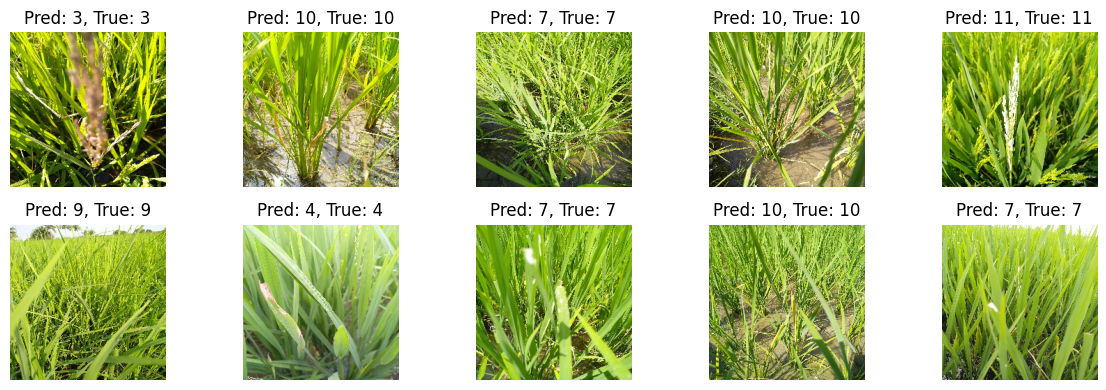

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(X_test[i])
    plt.title(f"Pred: {y_pred[i]}, True: {y_true[i]}")
    plt.axis("off")
plt.tight_layout()
plt.show()


# Deployment with Streamlit

In [ ]:
!pip install -q streamlit pillow

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 1.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.8/9.8 MB 77.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 133.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 7.7 MB/s eta 0:00:00


In [ ]:
# Prepare class names and generate the app code
class_names = list(class_map.keys())  # e.g. ['Blast', 'BrownSpot', ..., 'Healthy']

app_code = f'''
import streamlit as st
from PIL import Image
import requests
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing import image

# --- Load your trained model ---
model = tf.keras.models.load_model("efficientnet_weather_fusion_model.h5")  # Make sure this is in the same folder

# --- Define class names in correct index order ---
class_names = [
    'bacterial_leaf_blight', 'bacterial_leaf_streak', 'bacterial_panicle_blight',
    'black_stem_borer', 'blast', 'brown_spot', 'downy_mildew', 'hispa',
    'leaf_roller', 'normal', 'tungro', 'white_stem_borer', 'yellow_stem_borer'
]

st.title("🌾 Paddy Disease Detection with Weather!")

# --- Image Upload ---
uploaded_file = st.file_uploader("Upload a paddy leaf image", type=["jpg", "png"])

# --- City Input ---
city = st.text_input("Enter your city for weather info")

if st.button("Check Disease"):
    if uploaded_file is not None and city:
        # Display the uploaded image
        image_display = Image.open(uploaded_file)
        st.image(image_display, caption="Uploaded Leaf", use_column_width=True)

        # --- Get weather data ---
        api_key = "d9644c6b7581ce2dcff29b84b0c4058b"
        url = f"http://api.openweathermap.org/data/2.5/weather?q={city}&appid={api_key}"
        response = requests.get(url).json()

        try:
            weather = response["weather"][0]["main"]
            temp = response["main"]["temp"] - 273.15  # Kelvin to Celsius
            st.write(f"Weather: {weather}, Temp: {temp:.2f}°C")
        except:
            st.error("🌧️ Could not fetch weather info. Please check the city name.")

        # --- Image preprocessing (Make sure size matches training) ---
        img = Image.open(uploaded_file).resize((128, 128))  # Change size if needed
        img_array = image.img_to_array(img)
        img_array = np.expand_dims(img_array, axis=0)
        img_array = img_array / 255.0  # Normalization (if you used this in training)

        # --- Predict using the model ---
        prediction = model.predict(img_array)
        predicted_class = class_names[np.argmax(prediction)]

        # --- Show prediction result ---
        st.success(f"🍃 Predicted Disease: **{predicted_class.replace('_', ' ').title()}**")

    else:
        st.warning("Please upload an image and enter a city!")

# Save the app code to app.py
with open('app.py', 'w') as f:
    f.write(app_code)

print("✅ app.py successfully created! Ready to launch with Streamlit.")


In [ ]:
!pip install streamlit pyngrok --quiet


In [ ]:
!pip install pyngrok --upgrade


In [ ]:
from pyngrok import ngrok

# Replace with your ngrok authtoken
ngrok.set_auth_token("2w0nMOxAHZLKBUc7uy2ZGd1r1oT_87QRNeVtiVyEGVXBUuVui")


In [ ]:
from pyngrok import ngrok

# Set the authentication token
ngrok.set_auth_token("2w0nMOxAHZLKBUc7uy2ZGd1r1oT_87QRNeVtiVyEGVXBUuVui")

# Start ngrok tunnel for Streamlit (port 8501 is where Streamlit runs)
public_url = ngrok.connect(8501)  # No need for YAML configurations
print("🌐 Your app is live at:", public_url)

# Run the Streamlit app in the background
!streamlit run app.py &

🌐 Your app is live at: NgrokTunnel: "https://cea7-34-28-197-197.ngrok-free.app" -> "http://localhost:8501"



  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://34.28.197.197:8501

2025-04-21 00:06:35.374749: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1745193995.399974   40999 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1745193995.407528   40999 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-04-21 00:06:39.489536: W tensorflow/core/common_runtime/gpu/gpu_bfc_allocator.cc:47] Overriding orig_value setting because the TF_FORCE_GPU_ALLOW_GRO